# Data analysis of MARTINI CHI1

In [2]:
# Import Python packages

In [3]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from matplotlib import axes
import nglview as nv
import mdtraj as md

In [4]:
# Import Python molecular dynamics tools

In [5]:
import MDAnalysis as mda
from MDAnalysis.analysis import rms, align, pca
from MDAnalysis.analysis import dihedrals
from MDAnalysis.analysis import contacts
from MDAnalysis.analysis import helix_analysis as hel
from MDAnalysis.tests.datafiles import PDB, GRO, XTC

In [6]:
# Import data (protein only)

datadir = os.getcwd()
datadir

'/Users/teresa/Desktop/Definitive_PPP/MARTINI'

In [7]:

datadir = os.getcwd()

gro_chi1_303_20 = datadir+'/303/gromacs_chi1_20ns_303k/step5_production.gro'
xtc_chi1_303_20 = datadir+'/303/gromacs_chi1_20ns_303k/step5_production_centered_system.xtc'
tpr_chi1_303_20 = datadir+'/303/gromacs_chi1_20ns_303k/step5_production.tpr'
gro_chi1_303_100 = datadir+'/303/gromacs_chi1_100ns_303k/step5_production.gro'
xtc_chi1_303_100 = datadir+'/303/gromacs_chi1_100ns_303k/step5_production_centered_system.xtc'
tpr_chi1_303_100 = datadir+'/303/gromacs_chi1_100ns_303k/step5_production.tpr'

gro_chi1_310_20 = datadir+'/310/1.1/gromacs_chi1_1.1_20ns_310k/step5_production.gro'
xtc_chi1_310_20 = datadir+'/310/1.1/gromacs_chi1_1.1_20ns_310k/step5_production_centered_system.xtc'
tpr_chi1_310_20 = datadir+'/310/1.1/gromacs_chi1_1.1_20ns_310k/step5_production.tpr'
gro_chi1_310_100 = datadir+'/310/1.1/gromacs_chi1_1.1_100ns_310k/step5_production.gro'
xtc_chi1_310_100 = datadir+'/310/1.1/gromacs_chi1_1.1_100ns_310k/step5_production_centered_system.xtc'
tpr_chi1_310_100 = datadir+'/310/1.1/gromacs_chi1_1.1_100ns_310k/step5_production.tpr'

#index = 'index.ndx'


## Load trajectory

In [8]:
u_1_303_20 = mda.Universe(gro_chi1_303_20, xtc_chi1_303_20, in_memory= True)
u_1_303_100 = mda.Universe(gro_chi1_303_100, xtc_chi1_303_100, in_memory= True)
u_1_310_20 = mda.Universe(gro_chi1_310_20, xtc_chi1_310_20, in_memory= True)
u_1_310_100 = mda.Universe(gro_chi1_310_100, xtc_chi1_310_100, in_memory= True)

In [9]:
# Print figure
# domain_view.render_image()
#domain_view.download_image(filename='my_image.png', factor=4, trim=True)
domain_view = nv.show_mdanalysis(u_1_310_20) 
domain_view.color_by('chainID') 
domain_view
print("Trajectory length="+str(len(u_1_303_100.trajectory))+" frames.")

Trajectory length=1001 frames.


In [10]:
# Equivalently can load trajectory as
# traj = md.load("step5_production_center.xtc", top="chi2_proa.cg.pdb")
# view = nv.show_mdtraj(traj)
# view

## Radius of gyration for 20 ns

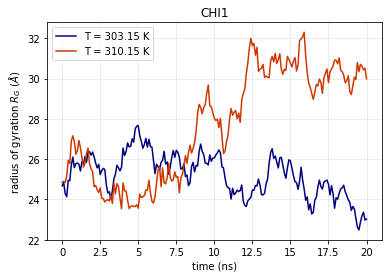

In [55]:
Rgyr_303 = []
Rgyr_310 = []
protein_303 = u_1_303_20.select_atoms("protein") 
protein_310 = u_1_310_20.select_atoms("protein")

for ts in u_1_303_20.trajectory:
    Rgyr_303.append((u_1_303_20.trajectory.time, protein_303.radius_of_gyration())) 
Rgyr_303 = np.array(Rgyr_303)

for ts in u_1_310_20.trajectory:
    Rgyr_310.append((u_1_310_20.trajectory.time, protein_310.radius_of_gyration())) 
Rgyr_310 = np.array(Rgyr_310)

# plot
ax = plt.subplot(111)
ax.plot(Rgyr_303[:,0], Rgyr_303[:,1], color = '#000080', lw=1.5, label="T = 303.15 K") 
ax.plot(Rgyr_310[:,0], Rgyr_310[:,1], color = '#CD3700', lw=1.5, label="T = 310.15 K") 

scale_x = 1e3
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_major_formatter(ticks)

ax.set_xlabel("time (ns)")
ax.set_ylabel(r"radius of gyration $R_G$ ($\AA$)") 
ax.grid(color = '#DCDCDC', lw = 0.5)

plt.title("CHI1")

ax.legend()
plt.draw()

## Radius of gyration for 100 ns

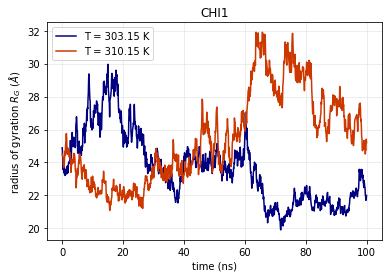

In [56]:
Rgyr_303 = []
Rgyr_310 = []
protein_303 = u_1_303_100.select_atoms("protein") 
protein_310 = u_1_310_100.select_atoms("protein")

for ts in u_1_303_100.trajectory:
    Rgyr_303.append((u_1_303_100.trajectory.time, protein_303.radius_of_gyration())) 
Rgyr_303 = np.array(Rgyr_303)

for ts in u_1_310_100.trajectory:
    Rgyr_310.append((u_1_310_100.trajectory.time, protein_310.radius_of_gyration())) 
Rgyr_310 = np.array(Rgyr_310)

# plot
ax = plt.subplot(111)
ax.plot(Rgyr_303[:,0], Rgyr_303[:,1], color = '#000080', lw=1.5, label="T = 303.15 K") 
ax.plot(Rgyr_310[:,0], Rgyr_310[:,1], color = '#CD3700', lw=1.5, label="T = 310.15 K") 

scale_x = 1e3
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_major_formatter(ticks)

ax.set_xlabel("time (ns)")
ax.set_ylabel(r"radius of gyration $R_G$ ($\AA$)") 
ax.grid(color = '#DCDCDC', lw = 0.5)
plt.title("CHI1")
ax.legend()
plt.draw()

## RMSD using a tool that already aligns the trajectory to a reference frame


In [57]:
R_303 = rms.RMSD(u_1_303_20, # universe to align
             u_1_303_20, # reference universe 
             select = 'protein', # group to superimpose and calculate the RMSD
             ref_frame = 0) # frame index for reference

R_310 = rms.RMSD(u_1_310_20, # universe to align
             u_1_310_20, # reference universe 
             select = 'protein', # group to superimpose and calculate the RMSD
             ref_frame = 0) # frame index for reference

R_303.run()
R_310.run()

In [58]:
R_303.results.rmsd.shape
R_310.results.rmsd.shape

(201, 3)

In [59]:
df_303 = pd.DataFrame(R_303.results.rmsd, columns = ['Frame', 'Time (ps)', 'protein'])
df_303

,Frame,Time (ps),protein
0,0.0,0.0,0.000000
1,1.0,100.0,4.577134
2,2.0,200.0,5.841380
3,3.0,300.0,6.332994
4,4.0,400.0,6.319495
...,...,...,...
196,196.0,19600.0,20.228908
197,197.0,19700.0,20.264663
198,198.0,19800.0,19.953690
199,199.0,19900.0,19.881013


In [60]:
df_310 = pd.DataFrame(R_310.results.rmsd, columns = ['Frame', 'Time (ps)', 'protein'])
df_310

,Frame,Time (ps),protein
0,0.0,0.0,8.737157e-07
1,1.0,100.0,4.186648e+00
2,2.0,200.0,5.299531e+00
3,3.0,300.0,5.827703e+00
4,4.0,400.0,7.144972e+00
...,...,...,...
196,196.0,19600.0,2.168888e+01
197,197.0,19700.0,2.193971e+01
198,198.0,19800.0,2.176682e+01
199,199.0,19900.0,2.165020e+01


Text(0, 0.5, 'RMSD ($\\AA$)')

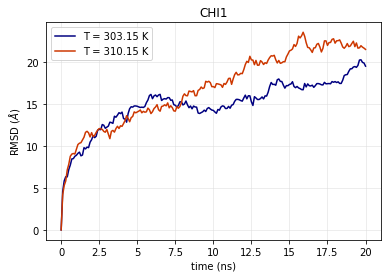

In [61]:

rmsd_303 = R_303.results.rmsd.T   # transpose makes it easier for plotting
rmsd_310 = R_310.results.rmsd.T
time = rmsd_303[1]
#fig = plt.figure(figsize=(4,4))
ax = plt.subplot(111)
ax.plot(time, rmsd_303[2], color = '#000080', lw=1.5,  label="T = 303.15 K")
ax.plot(time, rmsd_310[2], color = '#CD3700',lw=1.5,  label="T = 310.15 K")
ax.legend(loc="best")

ax.grid(color = '#DCDCDC', lw = 0.5)

scale_x = 1e3
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_major_formatter(ticks)
plt.title("CHI1")

ax.set_xlabel("time (ns)")
ax.set_ylabel(r"RMSD ($\AA$)")
#ax.savefig("rmsd_all_CORE_LID_NMP_ref1AKE.pdf")

## RMSD for Chi1 100ns

In [62]:
R_303 = rms.RMSD(u_1_303_100, # universe to align
             u_1_303_100, # reference universe 
             select = 'protein', # group to superimpose and calculate the RMSD
             ref_frame = 0) # frame index for reference

R_310 = rms.RMSD(u_1_310_100, # universe to align
             u_1_310_100, # reference universe 
             select = 'protein', # group to superimpose and calculate the RMSD
             ref_frame = 0) # frame index for reference

R_303.run()
R_310.run()

Text(0, 0.5, 'RMSD ($\\AA$)')

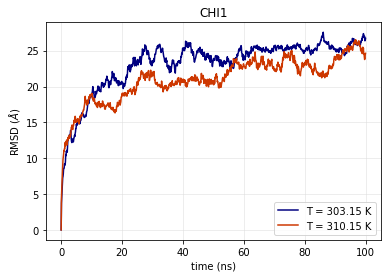

In [65]:
rmsd_303 = R_303.rmsd.T   # transpose makes it easier for plotting
rmsd_310 = R_310.rmsd.T
time = rmsd_303[1]
#fig = plt.figure(figsize=(4,4))
ax = plt.subplot(111)
ax.plot(time, rmsd_303[2], color = '#000080', lw=1.5,   label="T = 303.15 K")
ax.plot(time, rmsd_310[2], color = '#CD3700',lw=1.5,  label="T = 310.15 K")
ax.legend(loc="best")

scale_x = 1e3
ticks = ticker.FuncFormatter(lambda x, pos: '{0:g}'.format(x/scale_x))
ax.xaxis.set_major_formatter(ticks)
plt.title("CHI1")

ax.grid(color = '#DCDCDC', lw = 0.5)

ax.set_xlabel("time (ns)")
ax.set_ylabel(r"RMSD ($\AA$)")

#fig.savefig("rmsd_all_CORE_LID_NMP_ref1AKE.pdf")

## Alignment of the trajectory to the first frame for 20 ns

In [66]:
mobile_303 = u_1_303_20
mobile_310 = u_1_310_20
ref_303 = u_1_303_20
ref_310 = u_1_310_20

mobile_303.trajectory[-1] #set mobile trajectory to last frame
mobile_310.trajectory[-1]
ref_303.trajectory[0] # set reference trajectory to first frame
ref_310.trajectory[0]

mobile_303sel = mobile_303.select_atoms('protein') 
mobile_310sel = mobile_310.select_atoms('protein')
ref_303sel = ref_303.select_atoms('protein')
ref_310sel = ref_310.select_atoms('protein')

In [67]:
aligner_303 = align.AlignTraj(mobile_303, ref_303,
                          select='all',
                          in_memory=True).run()
aligner_310 = align.AlignTraj(mobile_310, ref_310,
                          select='all',
                          in_memory=True).run()

## RMSF for 20 ns

In [68]:
RR_303 = rms.RMSF(mobile_303sel).run()
RR_310 = rms.RMSF(mobile_310sel).run()

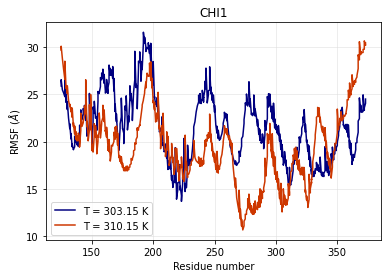

In [73]:
plt.plot(mobile_303sel.resids, RR_303.results.rmsf, color = '#000080', lw=1.5, label = "T = 303.15 K")
plt.plot(mobile_310sel.resids, RR_310.results.rmsf, color = '#CD3700',lw=1.5,  label = "T = 310.15 K")
plt.title("CHI1")

plt.grid(color = '#DCDCDC', lw = 0.5)

plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')

plt.legend()

## Alignement to first frame for 100 ns

In [74]:
mobile_303 = u_1_303_100
mobile_310 = u_1_310_100
ref_303 = u_1_303_100
ref_310 = u_1_310_100

mobile_303.trajectory[-1] #set mobile trajectory to last frame
mobile_310.trajectory[-1]
ref_303.trajectory[0] # set reference trajectory to first frame
ref_310.trajectory[0]

mobile_303sel = mobile_303.select_atoms('protein') 
mobile_310sel = mobile_310.select_atoms('protein')
ref_303sel = ref_303.select_atoms('protein')
ref_310sel = ref_310.select_atoms('protein')

In [75]:
aligner_303 = align.AlignTraj(mobile_303, ref_303,
                          select='all',
                          in_memory=True).run()
aligner_310 = align.AlignTraj(mobile_310, ref_310,
                          select='all',
                          in_memory=True).run()

## RMSF for 100 ns

In [76]:
RR_303 = rms.RMSF(mobile_303sel).run()
RR_310 = rms.RMSF(mobile_310sel).run()

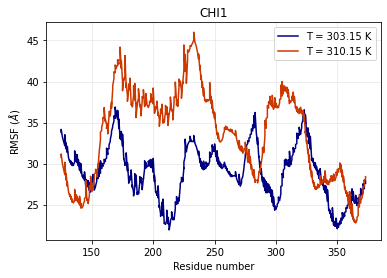

In [80]:
plt.plot(mobile_303sel.resids, RR_303.results.rmsf, color = '#000080',  label = "T = 303.15 K")
plt.plot(mobile_310sel.resids, RR_310.results.rmsf,  color = '#CD3700', label = "T = 310.15 K")
plt.xlabel('Residue number')
plt.ylabel('RMSF ($\AA$)')
plt.title("CHI1")

plt.grid(color = '#DCDCDC', lw = 0.5)
plt.legend()

## Visualising RMSF as B-factors
### 20ns and 303K

In [88]:
mobile_303.add_TopologyAttr('tempfactors')
for residue, r_value in zip(mobile_303sel.residues, RR_303.results.rmsf):
    residue.atoms.tempfactors = r_value

In [90]:
view = nv.show_mdanalysis(mobile_303)
view.update_representation(color_scheme='bfactor')
view

NGLWidget(max_frame=1000)

In [ ]:
mobile.atoms.write('rmsf_tempfactors.pdb')

## Q1 vs Q2 contact analysis 

Q1 refers to fraction of native contacts along a trajectory with reference to the first frame, and Q2 represents the fraction of native contacts with reference to the last.

In [ ]:
q1q2 = contacts.q1q2(mobile, 'all', radius = 8).run()

In [ ]:
q1q2_df = pd.DataFrame(q1q2.timeseries,
                       columns=['Frame',
                                'Q1',
                                'Q2'])
q1q2_df.head()